# Lab 9

Zadanie 1
Korzytając z pakietu Polynomials zaimplentuj wielomiany Legendre'a zdefiniowane w taki sposób:
$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

narysuj ich wykresy w przedziale (-1,1).
sprawdź(np. za pomocą fukcji roots z pakietu Polynomials), że ich zera sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

In [1]:
using QuadGK
using Polynomials
using Plots

In [2]:
function Legendre(k)
    if k == 0 return Poly([1]) end
    if k == 1 return Poly([0,1]) end
    return ((2k-1)/k) * Poly([0,1]) * Legendre(k-1) - (k-1)/k * Legendre(k-2)
end

Legendre (generic function with 1 method)

In [3]:
xs = -1:0.01:1

ys_0 = [polyval(Legendre(0), x) for x in xs]
ys_1 = [polyval(Legendre(1), x) for x in xs]
ys_2 = [polyval(Legendre(2), x) for x in xs]
ys_3 = [polyval(Legendre(3), x) for x in xs]
ys_4 = [polyval(Legendre(4), x) for x in xs]
ys_5 = [polyval(Legendre(5), x) for x in xs]

201-element Array{Float64,1}:
 -1.0000000000000002  
 -0.8551803929625001  
 -0.7204462748000007  
 -0.5953917023875     
 -0.47961999359999963 
 -0.37274363281249967 
 -0.27438417639999985 
 -0.18417215823750102 
 -0.10174699520000022 
 -0.02675689266250039 
  0.041141249999999845
  0.10228193391249975 
  0.15699115520000015 
  ⋮                   
 -0.10228193391249975 
 -0.041141249999999845
  0.02675689266250039 
  0.10174699520000022 
  0.18417215823750102 
  0.27438417639999985 
  0.37274363281249967 
  0.47961999359999963 
  0.5953917023875     
  0.7204462748000007  
  0.8551803929625001  
  1.0000000000000002  

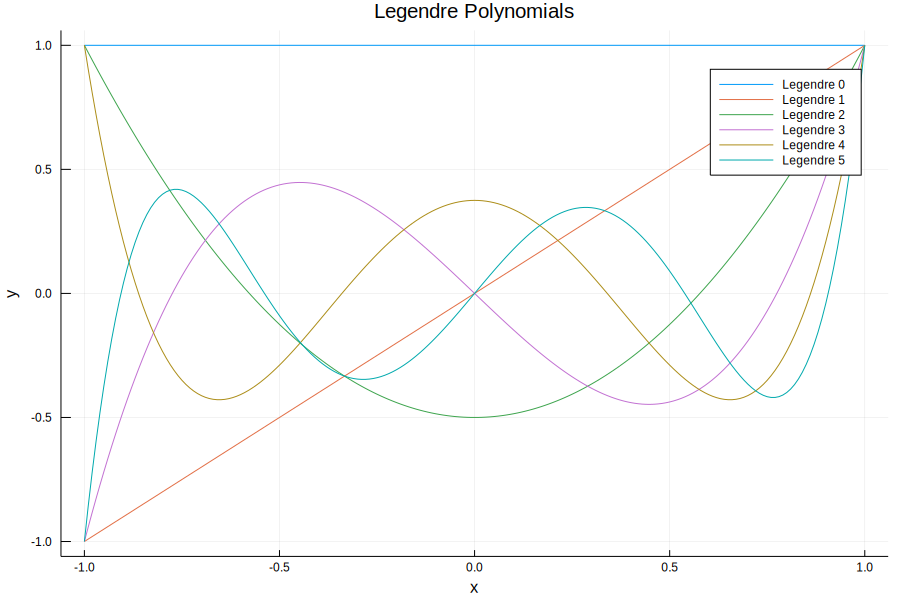

In [4]:
plot(xs, ys_0, label = "Legendre 0", title = "Legendre Polynomials", xlabel = "x", ylabel = "y", size = (900, 600))
plot!(xs, ys_1, label = "Legendre 1")
plot!(xs, ys_2, label = "Legendre 2")
plot!(xs, ys_3, label = "Legendre 3")
plot!(xs, ys_4, label = "Legendre 4")
plot!(xs, ys_5, label = "Legendre 5")

In [5]:
l2 = Legendre(2)
l3 = Legendre(3)
l4 = Legendre(4)

println("stopien = 2")
l2_roots = roots(l2)
println(l2_roots)
(xp,a)=gauss(Float64,2)
println(xp)

println("stopien = 3")
l3_roots = roots(l3)
println(sort(l3_roots))
(xp,a)=gauss(Float64,3)
println(sort(xp))

println("stopien = 4")
l4_roots = roots(l4)
println(sort(l4_roots))
(xp,a)=gauss(Float64,4)
println(sort(xp))

stopien = 2
[-0.5773502691896258, 0.5773502691896256]
[-0.5773502691896258, 0.5773502691896258]
stopien = 3
[-0.7745966692414834, 0.0, 0.7745966692414833]
[-0.7745966692414834, 0.0, 0.7745966692414834]
stopien = 4
[-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531]
[-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]


Zadanie 2
Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$ policzy $\int_{-1}^{1} f dx$ metodą używającą funkcji:
gauss(k)
oraz sumy
sum(a .* f.(xp))
przetestuj dla wielomianów coraz większych stopni
sprawdz kiedy przestaje być dokładna,
podaj związek z twierdzeniem o stopniu dokładności kwadratury Gaussa

In [6]:
function integrate(f, k)
    (xp,a)=gauss(Float64,k)
    return sum(a .* f.(xp))
end

integrate (generic function with 1 method)

In [7]:
println("x^2: ", integrate(x->x^2, 3))
println("x^3: ", integrate(x->x^3, 3))
println("x^4: ", integrate(x->x^4, 3))
println("x^5: ", integrate(x->x^5, 3)) 
println("x^6: ", integrate(x->x^6, 3)) # 0.28571
println("x^7: ", integrate(x->x^7, 3))
println("x^8: ", integrate(x->x^8, 3)) # 0.22222

x^2: 0.6666666666666667
x^3: 0.0
x^4: 0.40000000000000013
x^5: 0.0
x^6: 0.24000000000000007
x^7: 0.0
x^8: 0.14400000000000007


In [8]:
println("x^2: ", integrate(x->x^2, 2))
println("x^3: ", integrate(x->x^3, 2))
println("x^4: ", integrate(x->x^4, 2)) # 0.4
println("x^5: ", integrate(x->x^5, 2)) 
println("x^6: ", integrate(x->x^6, 2)) # 0.28571

x^2: 0.6666666666666667
x^3: 0.0
x^4: 0.2222222222222223
x^5: 0.0
x^6: 0.07407407407407413


Zadanie 3
Skorzystaj z rozwiązania zadania 2 do napisania funkcji liczącej całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$

dokonując normalizacji do $\int_{-1}^{1} F(z) dz$

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.

In [9]:
function integrate(f, k)
    (xp,a)=gauss(Float64,k)
    return sum(a .* f.(xp))
end

function normalize(f, a, b)
    return x -> f((b+a)/2 + (b-a)/2 * x) * (b-a)/2
end

function integrate2(f, a, b, k)
    g = normalize(f, a, b)
    return integrate(g, k)
end

integrate2 (generic function with 1 method)

In [10]:
integrate2(x->x^5+5x^4+x, -5, 5, 3)  # 6250

6250.000000000001

In [11]:
integrate2(x->x^3+5x^2+10x+11, -7, 12, 3)  # 8719.4

8719.416666666668

In [12]:
integrate2(x->x^7+500x^4-121x^3-1250, -10, 5, 10)   # -1.87383 * 10^6

-1.873828125e6

Zadanie 4
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja guadgk używająca całkowania Gauss-Kronroda

użyj tej funkcji do policzenia całki dla przykładowego wielomianu.
funkcja ta ma możliwość liczenia również całek do nieskończoności Policz całkę od minus do plus nieskonczonosci standardowego rozkładu normalnego Gaussa $ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

In [13]:
w(x) = 10x^7 - 7x^6 + 12x^5 - 3x^4 + 2x^3 - x^2 - 5x + 110
quadgk(w, -20, 20) # integral, error

(-2.563840933333379e9, 1.1444091796875e-5)

In [14]:
g(x) = 1/sqrt(2pi) * exp(-x^2/2)
quadgk(g, -Inf, Inf)

(1.0000000000032583, 1.4395584941504537e-8)

Zadanie 5
Napisz własną funkcję całkującą metodą prostokątów albo trapezów. Narysuj wykres funkcji błędu w stosunku do wyniku otrzymanego analitycznie w zaleznosci od ilosci potrzebnych przedziałów dla przykładowego wielomianu.

In [15]:
function integrate_trapeze(f, a, b, n)
    dx = (b-a)/n
    result = 0
    for i in 0:n-1
        result += 0.5 * (f(a+i*dx) + f(a+(i+1)*dx)) * dx
    end
    return result
end

integrate_trapeze (generic function with 1 method)

In [16]:
f(x) = x^5+5x^4+x # 6250

intervals_count = Int[]
error = Float64[]

for i = 5:5:100
    push!(intervals_count, i)
    push!(error, abs(integrate_trapeze(f, -5, 5, i) - 6250) / 6250 * 100)
end

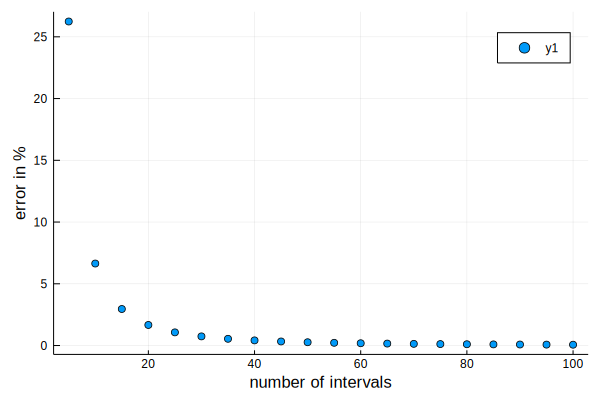

In [17]:
scatter(intervals_count, error, xlabel = "number of intervals", ylabel = "error in %")

In [18]:
(integrate_trapeze(f, -5, 5, 40) - 6250)/6250 *100

0.4165625